In [13]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, auc, roc_auc_score, log_loss, mean_squared_error
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from rit.tree import DecisionTreeClassifier as MyDecisionTreeClassifier
from rit.tree import DecisionTreeRegressor as MyDecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from rit.ensemble import RandomForestClassifier as MyRandomForestClassifier
from rit.ensemble import RandomForestRegressor as MyRandomForestRegressor

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification, make_regression

from scipy.stats import f_oneway

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from scipy.stats import mannwhitneyu

# helpfunctions

In [14]:
def Visualise_classification_2D(X, y):
  cols = ['blue', 'red', 'green', 'yellow']
  plt.figure(figsize=(9,4))
  plt.xlim((np.min(X) - 0.5, np.max(X) + 0.5)),
  plt.ylim((np.min(X) - 0.5, np.max(X) + 0.5))

  for k in np.unique(y):
      plt.plot(X[y==k,0], X[y==k,1], 'o',
                label='класс {}'.format(k), color=cols[k])

  plt.legend(loc='best')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

def Visualise_regression_2D(X, y, xlim, ylim):
  plt.figure(figsize=[9, 4])
  plt.xlim((xlim[0], xlim[1]))
  plt.ylim((ylim[0], ylim[1]))

  sc = plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

  plt.colorbar(sc)

  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

In [15]:
def func_reg(X, y, alpha):
  params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'n_estimators': [2500]}
  clf = GridSearchCV(MyRandomForestRegressor(random_state=0,
                                              n_estimators=params['n_estimators'],
                                              max_depth=params['max_depth'],
                                              max_leaf_nodes=2**max(params['max_depth']),
                                              bootstrap=True,
                                              oob_score=True,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=alpha),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))])
  clf.fit(X, y)
  rf = clf.best_estimator_
  print("rit_alpha = {}, max_depth = {}, score = {}".format(rf.rit_alpha, rf.max_depth, rf.oob_score_))
  return rf.oob_score_


def func_class(X, y, alpha):
  params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15], 'n_estimators': [2500]}
  clf = GridSearchCV(MyRandomForestClassifier(random_state=0,
                                              n_estimators=params['n_estimators'],
                                              max_depth=params['max_depth'],
                                              max_leaf_nodes=2**max(params['max_depth']),
                                              bootstrap=True,
                                              oob_score=accuracy_score,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=alpha),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))])
  clf.fit(X, y)
  rf = clf.best_estimator_
  print("rit_alpha = {}, max_depth = {}, score = {}".format(rf.rit_alpha, rf.max_depth, rf.oob_score_))
  return rf.oob_score_

# Выборки

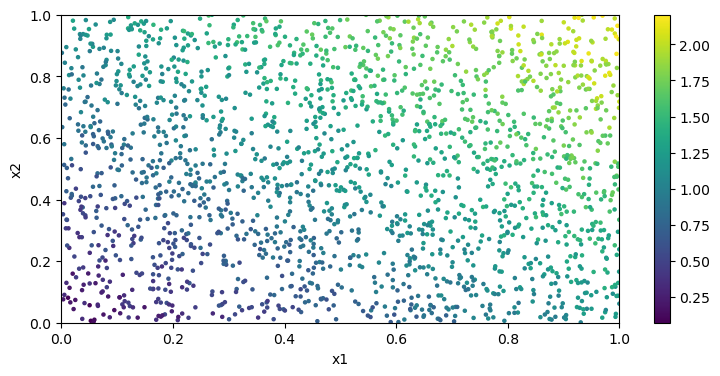

In [16]:
def data_regression_2D_1():
  n = 2
  N = 2000

  X1 = np.random.random(N)
  X2 = np.random.random(N)

  y = X1 + X2 + np.random.random(N)/3
  X = np.vstack([X1, X2]).transpose(1, 0)

  return X, y

X, y = data_regression_2D_1()
Visualise_regression_2D(X, y, (0, 1), (0, 1))

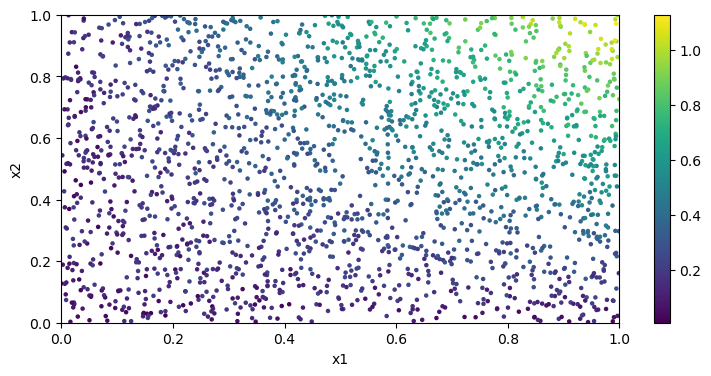

In [17]:
def data_regression_2D_2():
  n = 2
  N = 2000

  X1 = np.random.random(N)
  X2 = np.random.random(N)

  y = X1 * X2 + np.random.random(N)/5
  X = np.vstack([X1, X2]).transpose(1, 0)

  return X, y

X, y = data_regression_2D_2()
Visualise_regression_2D(X, y, (0, 1), (0, 1))

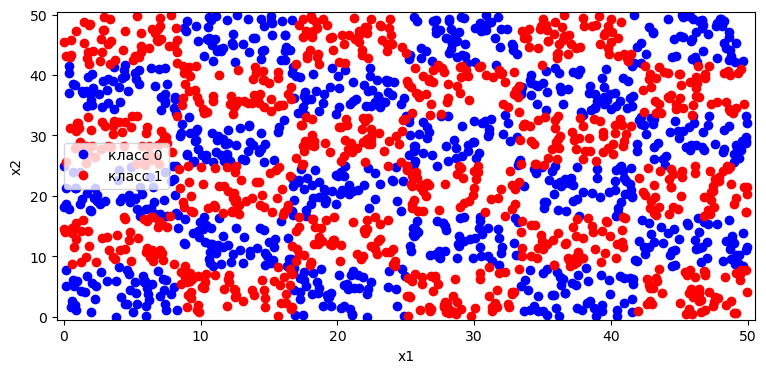

In [18]:
def data_classification_2D_3():
    n = 2
    l = 2000

  # Параметры
    width = 50         # Ширина прямоугольника
    height = 50        # Высота прямоугольника
    cols = 6         # Количество столбцов сетки
    rows = 6          # Количество строк сетки
    points_per_cell = 50  # Количество точек в каждой ячейке

    # Вычисление размеров ячейки
    cell_width = width / cols
    cell_height = height / rows

    # Генерация данных
    X = []
    y = []

    for i in range(cols):
        for j in range(rows):
            # Генерация координат точек внутри ячейки (i, j)
            x_points = np.random.uniform(i * cell_width, (i + 1) * cell_width, points_per_cell)
            y_points = np.random.uniform(j * cell_height, (j + 1) * cell_height, points_per_cell)
            
            # Определение класса (шахматный порядок)
            class_label = (i + j) % 2
            
            # Сохранение данных
            X.extend(np.column_stack((x_points, y_points)))
            y.extend([class_label] * points_per_cell)

    X = np.array(X)
    y = np.array(y)

    return X, y

X, y = data_classification_2D_3()
Visualise_classification_2D(X, y)

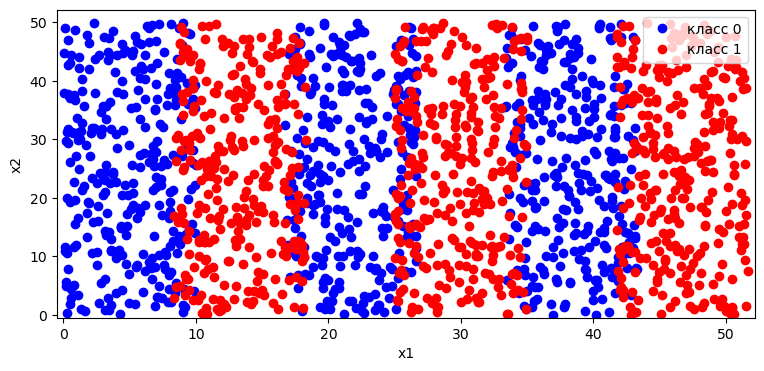

In [19]:
def data_classification_2D_4():
    n = 2
    l = 2000

    # Параметры
    width = 50        # Ширина прямоугольника
    height = 50         # Высота прямоугольника
    cols = 6           # Количество столбцов
    rows = 6           # Количество строк
    points_per_cell = 50  # Количество точек в каждой ячейке

    # Размеры ячейки
    cell_width = width / cols
    cell_height = height / rows

    # Генерация данных
    X = []
    y = []

    for i in range(cols):
        for j in range(rows):
            # Генерация случайных точек внутри ячейки (i, j)
            x_points = np.random.uniform(i * cell_width, (i + 1.2) * cell_width, points_per_cell)
            y_points = np.random.uniform(j * cell_height, (j + 1) * cell_height, points_per_cell)
            
            # Класс определяется только номером столбца (i)
            class_label = i % 2  # Четные столбцы — 0, нечетные — 1
            
            X.extend(np.column_stack((x_points, y_points)))
            y.extend([class_label] * points_per_cell)

    X = np.array(X)
    y = np.array(y)

    return X, y

X, y = data_classification_2D_4()
Visualise_classification_2D(X, y)

# Оценка выборок

## Regression

Regression $y = x_1 + x_2$

rit_alpha = -10000, max_depth = 7, score = 0.9438912849012149
rit_alpha = 0, max_depth = 7, score = 0.9438912849012149
rit_alpha = 0.1, max_depth = 7, score = 0.9438551003430986
rit_alpha = 0.2, max_depth = 7, score = 0.9438400704875975
rit_alpha = 0.3, max_depth = 7, score = 0.9438144617136579
rit_alpha = 0.5, max_depth = 7, score = 0.9436243178013757
rit_alpha = 0.7, max_depth = 7, score = 0.9429967271766293
rit_alpha = 0.8, max_depth = 7, score = 0.9414727343162088
rit_alpha = 0.9, max_depth = 8, score = 0.9345110167313243
rit_alpha = 0.91, max_depth = 8, score = 0.9321933394496619
rit_alpha = 0.93, max_depth = 8, score = 0.9236722965088393
rit_alpha = 0.95, max_depth = 8, score = 0.906329007746715
rit_alpha = 0.99, max_depth = 3, score = 0.7161973674390203
rit_alpha = 0.999, max_depth = 3, score = 0.7161701644003631


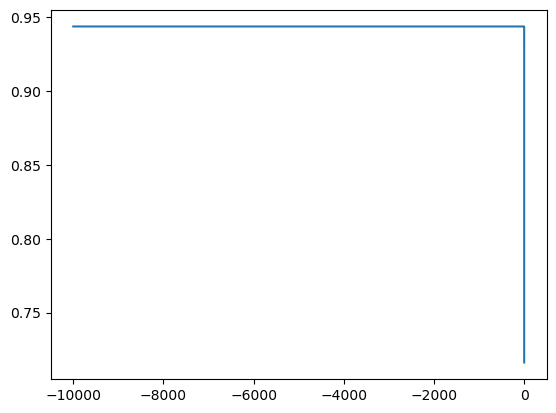

In [20]:
# 1
X, y = data_regression_2D_1()
alphas = [-10000, 0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95, 0.99, 0.999, 1]
arr_1 = []
for alpha in alphas[:-1]:
    arr_1.append(func_reg(X, y, alpha))
plt.plot(alphas[:-1], arr_1)
plt.show()

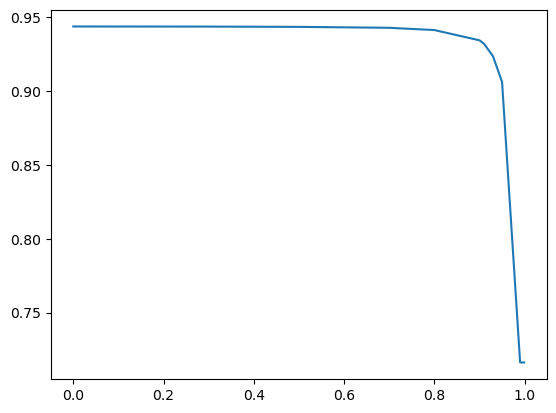

In [28]:
plt.plot(alphas[1:-1], arr_1[1:])
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = -10000 for max_depth from 1 to 20

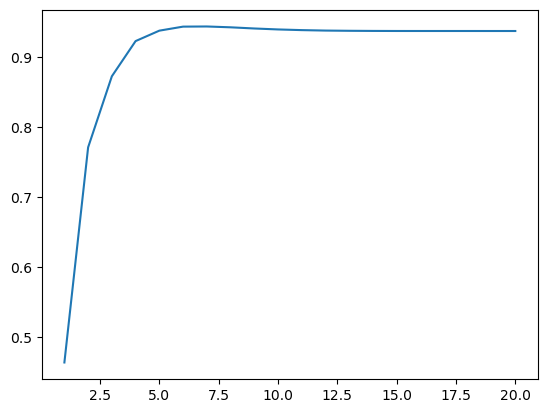

In [21]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=True,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=-10000)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = 0.999 for max_depth from 1 to 20

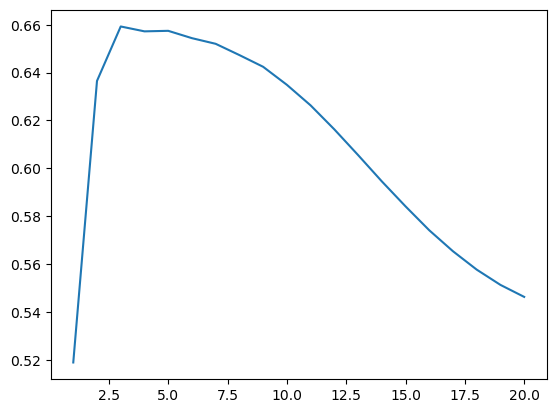

In [22]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=True,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.999)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = 0.5 for max_depth from 1 to 20

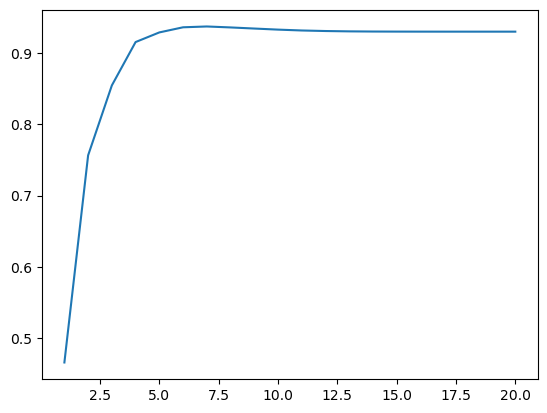

In [23]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=True,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.5)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 \cdot x_2$

rit_alpha = -10000, max_depth = 6, score = 0.9340597691473823
rit_alpha = 0, max_depth = 6, score = 0.9340597691473823
rit_alpha = 0.1, max_depth = 6, score = 0.9340271668081863
rit_alpha = 0.2, max_depth = 6, score = 0.9340638149211742
rit_alpha = 0.3, max_depth = 6, score = 0.9340728407643811
rit_alpha = 0.5, max_depth = 6, score = 0.933991008371904
rit_alpha = 0.7, max_depth = 6, score = 0.933481228999392
rit_alpha = 0.8, max_depth = 6, score = 0.93266353026619
rit_alpha = 0.9, max_depth = 7, score = 0.931631241154099
rit_alpha = 0.91, max_depth = 7, score = 0.9311712763134707
rit_alpha = 0.93, max_depth = 7, score = 0.9268762766415063
rit_alpha = 0.95, max_depth = 8, score = 0.9086087463208394
rit_alpha = 0.99, max_depth = 7, score = 0.5749668598084023
rit_alpha = 0.999, max_depth = 3, score = 0.554848019953694


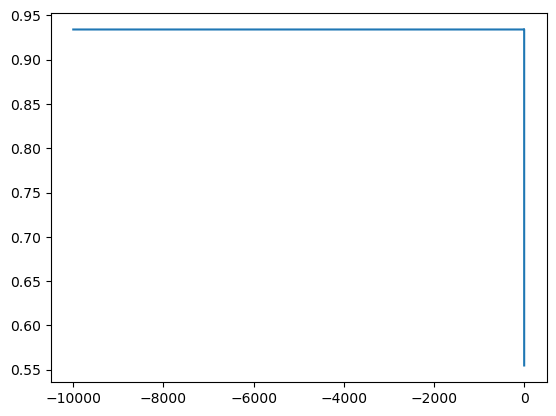

In [24]:
# 2
X, y = data_regression_2D_2()
alphas = [-10000, 0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95, 0.99, 0.999, 1]
arr_2 = []
for alpha in alphas[:-1]:
    arr_2.append(func_reg(X, y, alpha))
plt.plot(alphas[:-1], arr_2)
plt.show()

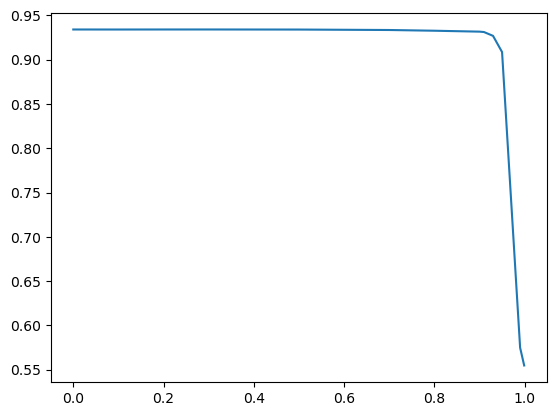

In [29]:
plt.plot(alphas[1:-1], arr_2[1:])
plt.show()

## Classification

Classification 1, есть взаимодействие, rit_alpha = 0.999 for max_depth from 1 to 20

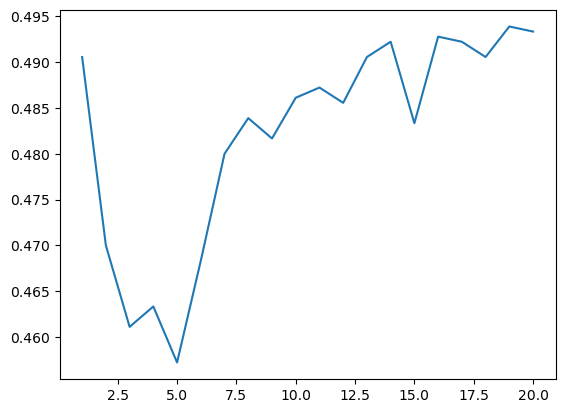

In [25]:
X, y = data_classification_2D_3()
arr = []
for i in range(1, 21):
    rf = MyRandomForestClassifier(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=accuracy_score,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.999)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Classification, есть взаимодействие

rit_alpha = -10000, max_depth = 15, score = 0.9522222222222222
rit_alpha = 0, max_depth = 15, score = 0.9788888888888889
rit_alpha = 0.1, max_depth = 15, score = 0.9683333333333334
rit_alpha = 0.2, max_depth = 15, score = 0.9688888888888889
rit_alpha = 0.3, max_depth = 15, score = 0.9683333333333334
rit_alpha = 0.5, max_depth = 15, score = 0.9566666666666667
rit_alpha = 0.7, max_depth = 15, score = 0.8933333333333333
rit_alpha = 0.8, max_depth = 15, score = 0.73
rit_alpha = 0.9, max_depth = 11, score = 0.545
rit_alpha = 0.91, max_depth = 12, score = 0.53
rit_alpha = 0.93, max_depth = 11, score = 0.5133333333333333
rit_alpha = 0.95, max_depth = 11, score = 0.5033333333333333
rit_alpha = 0.99, max_depth = 15, score = 0.5016666666666667
rit_alpha = 0.999, max_depth = 15, score = 0.5016666666666667


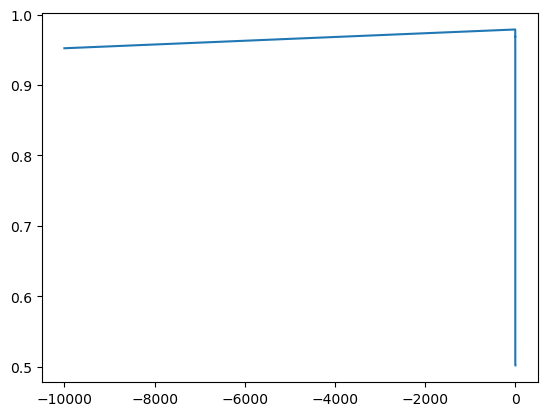

In [26]:
# 3
X, y = data_classification_2D_3()
alphas = [-10000, 0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95, 0.99, 0.999, 1]
arr_3 = []
for alpha in alphas[:-1]:
    arr_3.append(func_class(X, y, alpha))
plt.plot(alphas[:-1], arr_3)
plt.show()

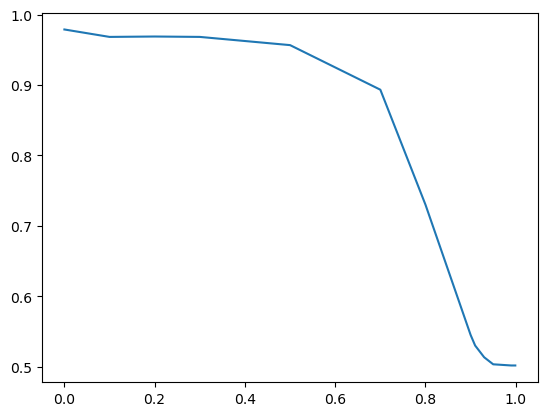

In [30]:
plt.plot(alphas[1:-1], arr_3[1:])
plt.show()

Classification, без взаимодействия

rit_alpha = -10000, max_depth = 15, score = 0.8433333333333334
rit_alpha = 0, max_depth = 6, score = 0.8577777777777778
rit_alpha = 0.1, max_depth = 6, score = 0.855
rit_alpha = 0.2, max_depth = 6, score = 0.8555555555555555
rit_alpha = 0.3, max_depth = 6, score = 0.855
rit_alpha = 0.5, max_depth = 6, score = 0.8544444444444445
rit_alpha = 0.7, max_depth = 6, score = 0.8538888888888889
rit_alpha = 0.8, max_depth = 6, score = 0.8533333333333334
rit_alpha = 0.9, max_depth = 6, score = 0.8538888888888889
rit_alpha = 0.91, max_depth = 6, score = 0.8555555555555555
rit_alpha = 0.93, max_depth = 6, score = 0.855
rit_alpha = 0.95, max_depth = 6, score = 0.8555555555555555
rit_alpha = 0.99, max_depth = 5, score = 0.8516666666666667
rit_alpha = 0.999, max_depth = 5, score = 0.8522222222222222


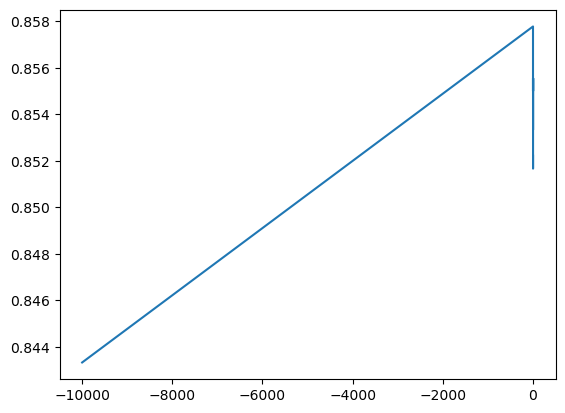

In [27]:
# 4
X, y = data_classification_2D_4()
alphas = [-10000, 0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.91, 0.93, 0.95, 0.99, 0.999, 1]
arr_4 = []
for alpha in alphas[:-1]:
    arr_4.append(func_class(X, y, alpha))
plt.plot(alphas[:-1], arr_4)
plt.show()

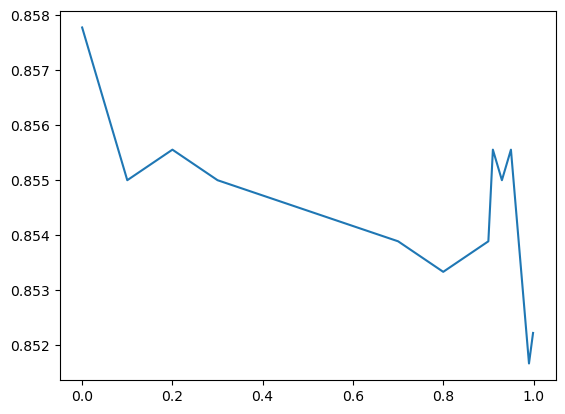

In [31]:
plt.plot(alphas[1:-1], arr_4[1:])
plt.show()